In [1]:
import requests
from bs4 import BeautifulSoup, StopParsing
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as mat2gray

# Scraper

In [2]:
def get_user_contributions(user):
    """
    Function that given a github profile, returns the cuantity of contributions that the user has made
    """

    url = f"https://github.com/{user}"
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "html.parser")

    # Search for all tags call 'rect'
    contributions = soup.find_all("rect")
    # print(contributions)

    dates = []
    data_count = []
    data_level = []
    for i in range(len(contributions)):
        # Delete what's not usefull
        if "data-count" not in contributions[i].attrs:
            continue
        else:
            # Add the data to some list's
            dates.append(contributions[i]["data-date"])
            data_count.append(contributions[i]["data-count"])
            data_level.append(contributions[i]["data-level"])

    return dates, data_count, data_level

dates, data_count, data_level = get_user_contributions("satelerd")

# Stars generator

In [3]:
def star_generator(data):
    """
    Function that given a list of contributions generate a graph of it
    """

    # Generate the principal matrix which will be graphed
    stars = (
        []
    )  # List in witch each element represents a day, and inside each day a list with 0 and 1, 0 if there is no star, 1 if there is a star
    weeks = 52
    weeks = 10
    days = 7
    rows_day = 3
    cols_day = 3
    for week in range(12, weeks + 12):
        for day in range(days):
            # Here we define the value of how many starts we need to generate that day
            # Then we add it to a list in a random order
            level = int(data[day + (days * week)])
            stars_cuantity = rows_day * cols_day / 6 * (level + 1)
            day_stars = []
            for i in range(rows_day * cols_day):
                if i <= stars_cuantity:
                    day_stars.append(1)
                else:
                    day_stars.append(0)
            random.shuffle(day_stars)

            day_matrix = []
            for row in range(rows_day):
                row_matrix = []

                for col in range(cols_day):
                    row_matrix.append(day_stars[row * cols_day + col])

                day_matrix.append(row_matrix)
            stars.append(day_matrix)

    # stars is actually a tensor
    # so now we have to generate a list that will reorder the stars in the tensor so that it become a matrix and it can be graphed.
    
    
    # We do this by using the function np.ravel()
    # np.ravel() is a function that flattens a matrix
    stars_matrix = []
    for week in range(weeks):
        for day in range(days):
            stars_matrix.append(np.ravel(stars[week * days + day]))
            

    return stars

stars = star_generator(data_level)

# Graph generator

In [4]:
def stars_graph(stars_matrix):
    plt.imshow(stars_matrix, cmap="binary")
    plt.show()

# Functions call

[[[0, 1, 0], [1, 0, 0], [0, 0, 0]], [[0, 0, 0], [1, 1, 0], [0, 0, 0]], [[0, 0, 0], [0, 1, 1], [0, 0, 0]], [[0, 0, 0], [0, 0, 1], [1, 0, 0]], [[0, 0, 1], [0, 0, 0], [0, 1, 0]], [[0, 0, 0], [0, 1, 1], [0, 0, 0]], [[1, 0, 0], [0, 0, 0], [1, 0, 0]], [[0, 0, 0], [1, 1, 0], [0, 0, 0]], [[0, 0, 0], [1, 0, 0], [0, 0, 1]], [[0, 0, 0], [0, 1, 0], [1, 0, 0]], [[0, 0, 0], [0, 0, 1], [0, 0, 1]], [[0, 0, 0], [0, 0, 1], [0, 0, 1]], [[0, 0, 0], [1, 0, 0], [1, 0, 0]], [[1, 0, 0], [0, 0, 0], [1, 0, 0]], [[1, 0, 0], [1, 0, 0], [0, 0, 0]], [[0, 0, 1], [0, 0, 1], [0, 0, 0]], [[1, 0, 1], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [1, 1, 0], [0, 0, 0]], [[0, 0, 0], [0, 1, 0], [1, 0, 0]], [[0, 0, 1], [0, 0, 0], [0, 1, 0]], [[1, 0, 0], [1, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 1], [1, 0, 0]], [[0, 0, 0], [0, 0, 0], [1, 0, 1]], [[1, 0, 0], [1, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 1, 1], [0, 0, 0]], [[0, 1, 0], [1, 0, 0], [0, 0, 0]], [[1, 0, 0], [0, 0, 1], [0, 0, 0]], [[1, 0, 0], [0, 0, 0], [0, 0, 1]], [[0, 0, 0], [0, 0, 

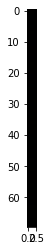

In [5]:
dates, data_count, data_level = get_user_contributions("satelerd")

stars_matrix = star_generator(data_level)
# print(stars_matrix)
# stars_matrix = np.array(stars_matrix)
print(stars_matrix)

stars_graph(stars_matrix)
# grafica(stars_list)
